# 4-5. 2D記述子に基づく回帰予測 †
LogPappを目的変数、特徴ベクトルを2D記述子とし、データセットの795化合物に対して回帰を行う機械学習プログラムを作成せよ。学習器は線形回帰, リッジ回帰, Support Vector Regression, Random Forest回帰, LightGBM等を用いることができるよう準備すること。

In [1]:
import pandas as pd
desc_2d = pd.read_csv("data/2d_desc.csv", index_col=0)
df = pd.read_csv("data/fukunishi_data.csv", index_col=0)

In [2]:
print(df.shape)
print(desc_2d.shape)

(794, 4)
(794, 201)


In [3]:
# 説明変数に 2D記述子 を利用
X = desc_2d
 
# 目的変数に "Logp App" を利用
Y = df["LogP app"]

In [4]:
Y.head()

No.
1   -2.67
2   -2.85
3   -3.80
4   -2.91
5   -3.22
Name: LogP app, dtype: float64

In [5]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 自作関数
from calc_score import regression    

##  線形回帰

best rmse: 1.14665
q2: -0.00000


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

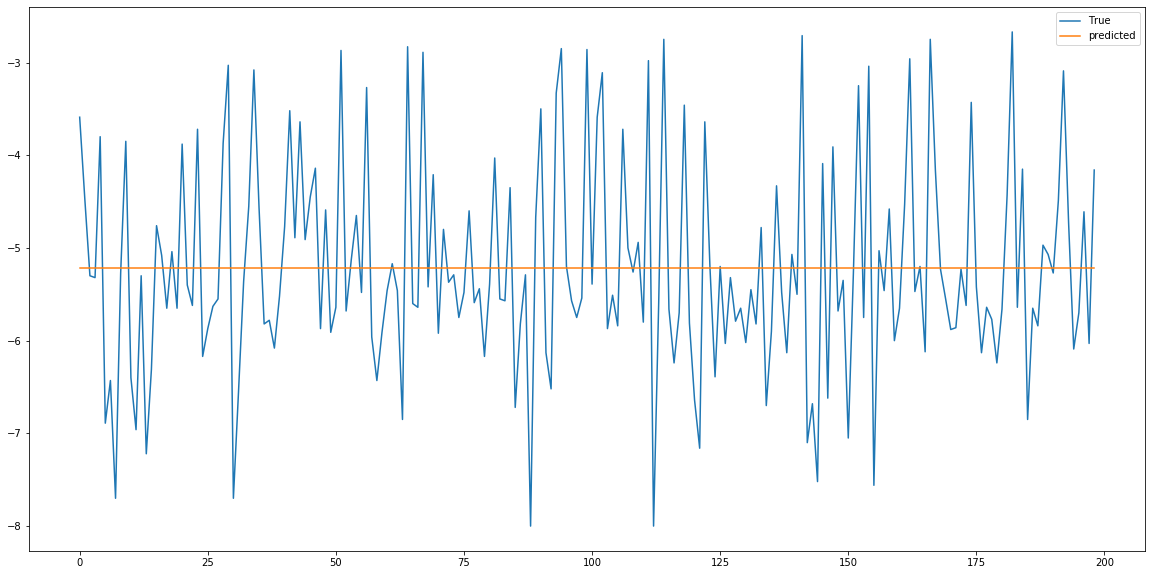

In [6]:
from sklearn import linear_model

clf = linear_model.LinearRegression()
regression(clf, X, Y, True, True)

## リッジ回帰

best rmse: 0.63654
q2: 0.70022


/Users/kaz_i/.pyenv/versions/miniconda3-4.3.30/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=8.00121e-68): result may not be accurate.
  overwrite_a=True).T


Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

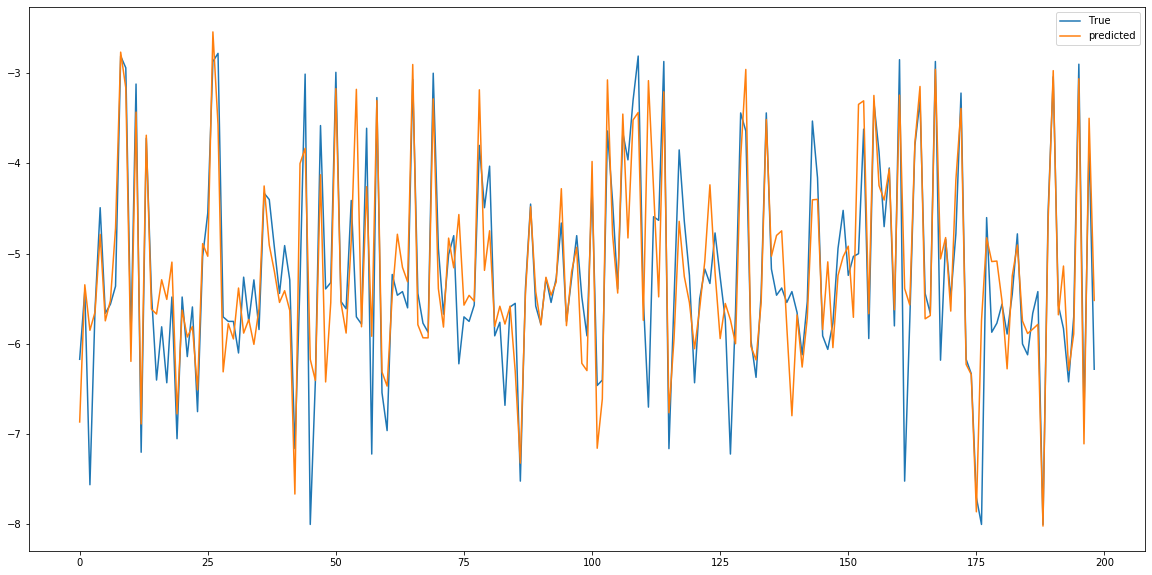

In [8]:
from sklearn import linear_model

reg = linear_model.Ridge(alpha=.5)
regression(reg, X, Y, True,True)

## Support Vector Regression

In [10]:
from sklearn.preprocessing import StandardScaler

#　標準化
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

best rmse: 0.66574
q2: 0.62287


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

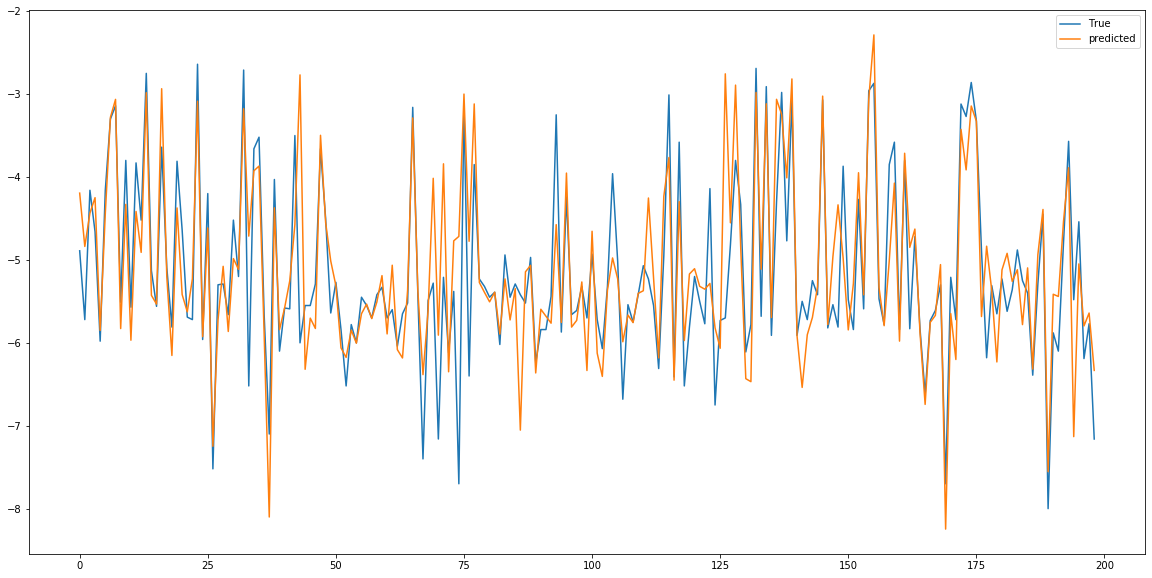

In [11]:
from sklearn.svm import SVR

svr = SVR(kernel='linear')
regression(svr, X_norm, Y, True, True)

## Random Forest回帰

best rmse: 0.43651
q2: 0.86555


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=1, oob_score=False,
                      random_state=2525, verbose=0, warm_start=False)

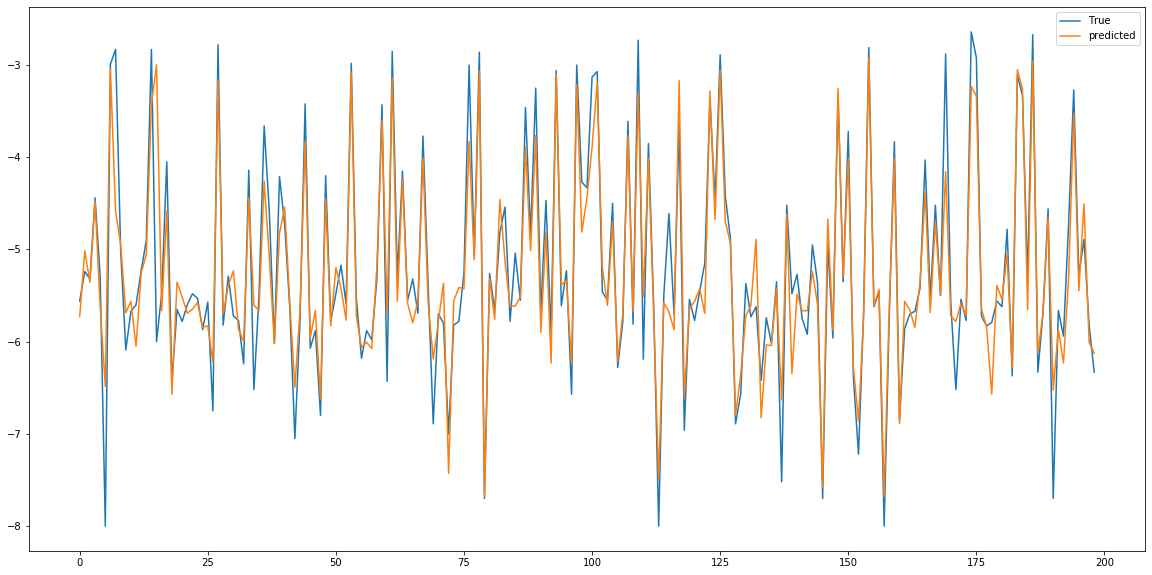

In [12]:
from sklearn.ensemble import RandomForestRegressor as RFR
 
rg = RFR(n_jobs=1, random_state=2525)
regression(rg, X_norm, Y, True, True)

# LightBGM

best rmse: 0.55763
q2: 0.73865


/Users/kaz_i/.pyenv/versions/miniconda3-4.3.30/envs/py36/lib/python3.6/site-packages/lightgbm/__init__.py:48: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

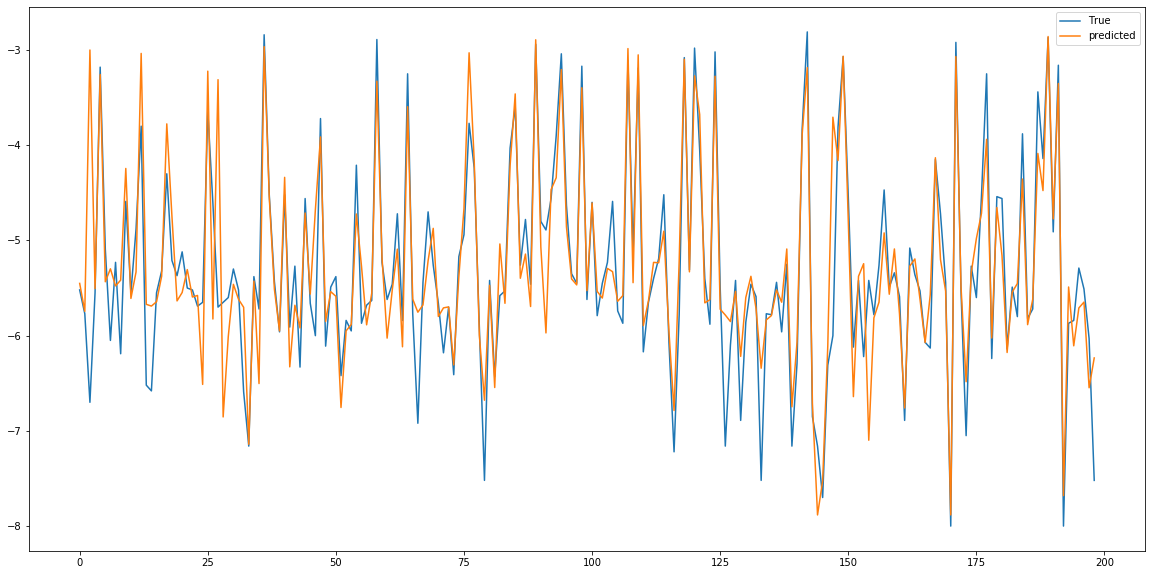

In [13]:
import lightgbm as lgb

lgb_reg = lgb.LGBMRegressor()
regression(lgb_reg, X_norm, Y, True, True)